In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install statsmodels==0.12.2

In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip install pandas_datareader

In [ ]:
!pip install statsmodels

In [ ]:
!pip install mplfinance

In [ ]:
!pip install finance-datareader

In [ ]:
!pip install pmdarima

In [ ]:
!pip install pykrx

# 모듈 임포트

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA

import seaborn as sns
import os

import pandas_datareader.data as web
import mplfinance as mpf

In [ ]:
from bs4 import BeautifulSoup
import csv
import os
import re
import requests

In [ ]:
import FinanceDataReader as fdr

In [ ]:
from pmdarima.arima import ndiffs
import pmdarima as pm
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
#그래프 한글띄우기
import pandas as pd
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

# 코스피 200 인덱스

In [ ]:
from pykrx import stock
 
KOSPI200 = stock.get_index_ohlcv_by_date("20190101", "20211231", "1028")
KOSPI200

코스피 200,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
2019-01-02,263.35,263.77,257.47,258.23,69949709,3186640984476
2019-01-03,258.19,258.70,255.35,255.77,90520685,3971916869836
2019-01-04,255.62,258.12,254.55,257.89,91200480,4173872799949
2019-01-07,261.11,263.13,260.76,261.57,92321424,3960240416630
2019-01-08,261.29,262.43,259.39,259.65,86910036,3358745354328
...,...,...,...,...,...,...
2021-12-24,399.72,402.46,399.66,400.53,102503125,6252101538980
2021-12-27,400.61,401.07,398.31,398.61,103635956,5653274752350
2021-12-28,399.56,401.21,397.24,401.21,169712212,9338598443762


In [ ]:
KOSPI200 = KOSPI200["종가"]

In [ ]:
KOSPI200.to_csv("KOSPI200지수.csv")

#### 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


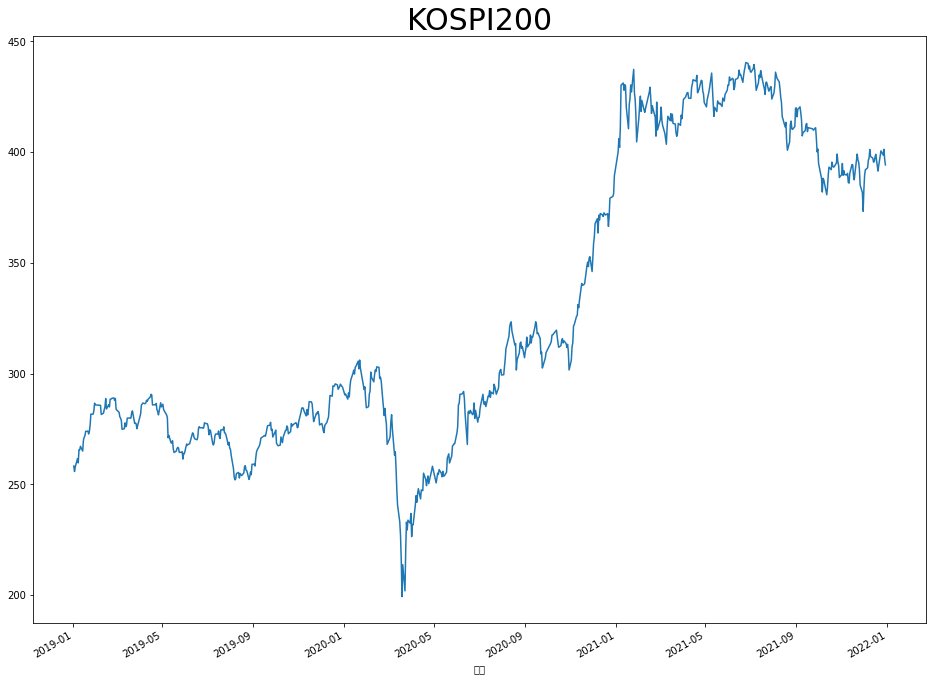

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(16,12))
plt.title("KOSPI200", fontsize =30)
KOSPI200.plot()

#### 데이터 나누기
train, test 8:2

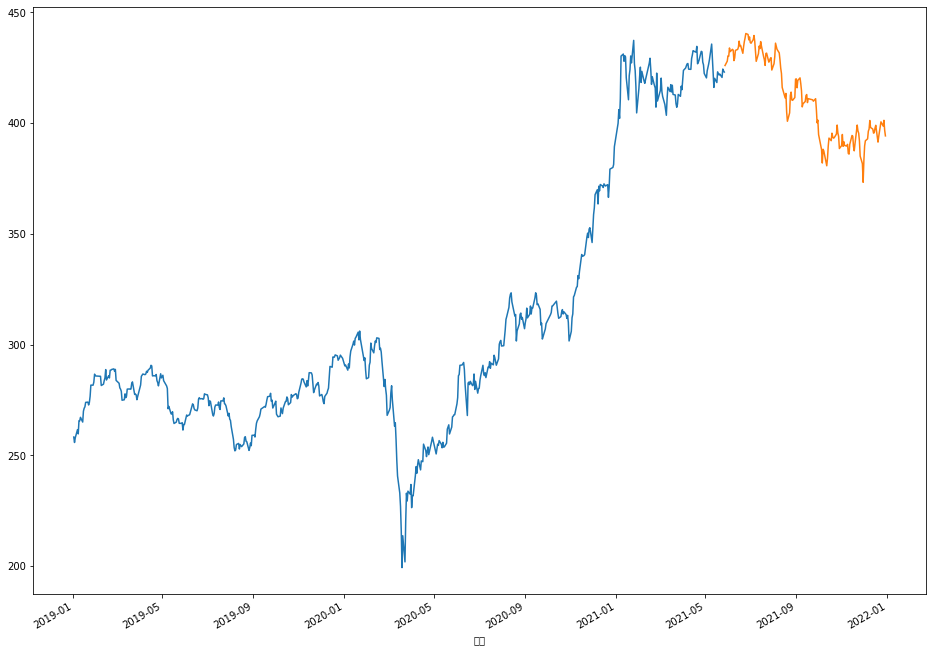

In [ ]:
# train, test 데이터 나누기
y_train = KOSPI200[:int(0.8*len(KOSPI200))]
y_test = KOSPI200[int(0.8*len(KOSPI200)):]
plt.figure(figsize=(16,12))
y_train.plot()
y_test.plot()

#### 연습

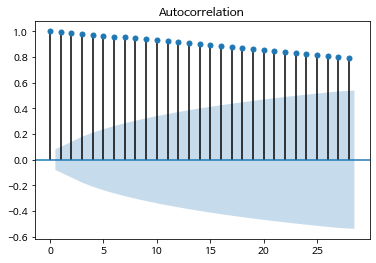

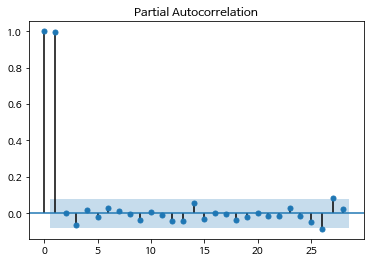

In [ ]:

# import matplotlib.pyplot as plt
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot_acf(y_train)
# plot_pacf(y_train)
# plt.show()

In [ ]:
# y_train = pd.DataFrame(y_train)

In [ ]:
# y_train['diff_Close'] = y_train['종가'].diff(1)

In [ ]:
# y_train

,종가,diff_Close
날짜,,
2019-01-02,258.23,NaN
2019-01-03,255.77,-2.46
2019-01-04,257.89,2.12
2019-01-07,261.57,3.68
2019-01-08,259.65,-1.92
...,...,...
2021-05-21,422.08,0.40
2021-05-24,420.57,-1.51
2021-05-25,424.35,3.78


In [ ]:
# y_train = y_train.iloc[1:]
# y_train

,종가,diff_Close
날짜,,
2019-01-03,255.77,-2.46
2019-01-04,257.89,2.12
2019-01-07,261.57,3.68
2019-01-08,259.65,-1.92
2019-01-09,265.60,5.95
...,...,...
2021-05-21,422.08,0.40
2021-05-24,420.57,-1.51
2021-05-25,424.35,3.78


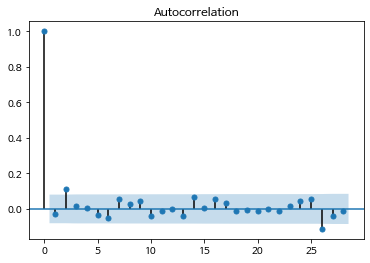

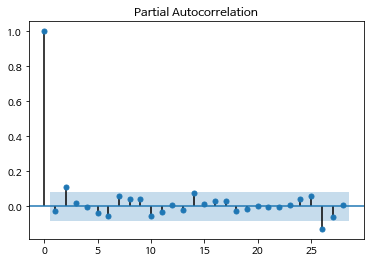

In [ ]:
# plot_acf(y_train['diff_Close'])
# plot_pacf(y_train['diff_Close'])
# plt.show()

In [ ]:
# y_train['종가']

날짜
2019-01-03    255.77
2019-01-04    257.89
2019-01-07    261.57
2019-01-08    259.65
2019-01-09    265.60
               ...  
2021-05-21    422.08
2021-05-24    420.57
2021-05-25    424.35
2021-05-26    423.54
2021-05-27    423.00
Name: 종가, Length: 592, dtype: float64

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# model = ARIMA(y_train['종가'], order=(0,1,0))
# model_fit = model.fit(trend='c',full_output=True, disp=1)
# print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.종가   No. Observations:                  591
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1675.567
Method:                           css   S.D. of innovations              4.121
Date:                Wed, 30 Mar 2022   AIC                           3355.135
Time:                        14:51:43   BIC                           3363.898
Sample:                             1   HQIC                          3358.548
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2830      0.170      1.669      0.095      -0.049       0.615


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
# model = ARIMA(y_train['종가'], order=(1,1,1))
# model_fit = model.fit(trend='c',full_output=True, disp=True)
# print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D.종가   No. Observations:                  591
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1674.160
Method:                       css-mle   S.D. of innovations              4.112
Date:                Wed, 30 Mar 2022   AIC                           3356.320
Time:                        14:52:03   BIC                           3373.847
Sample:                             1   HQIC                          3363.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2830      0.163      1.731      0.083      -0.037       0.603
ar.L1.D.종가    -0.6187      0.224     -2.758      0.006      -1.058      -0.179
ma.L1.D.종가     0.5645      0.234      2.412      0.0

In [ ]:
# model = ARIMA(y_train['종가'], order=(3,1,3))
# model_fit = model.fit(trend='c',full_output=True, disp=True)
# print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D.종가   No. Observations:                  591
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1668.508
Method:                       css-mle   S.D. of innovations              4.072
Date:                Wed, 30 Mar 2022   AIC                           3353.016
Time:                        16:08:51   BIC                           3388.070
Sample:                             1   HQIC                          3366.671
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2824      0.174      1.622      0.105      -0.059       0.624
ar.L1.D.종가     0.1387      0.317      0.438      0.662      -0.482       0.760
ar.L2.D.종가    -0.3513      0.245     -1.435      0.1

In [ ]:
# predict = model_fit.forecast(steps=len(y_test))
# predict

(array([423.91800034, 424.09524814, 423.71629569, 423.62968324,
        424.14523859, 424.91660711, 425.36739382, 425.3861368 ,
        425.33109465, 425.57608456, 426.10221366, 426.59842087,
        426.84338138, 426.92500789, 427.08703179, 427.44180091,
        427.87581508, 428.21336381, 428.41440105, 428.59121135,
        428.86030841, 429.21820826, 429.56798442, 429.83981192,
        430.05977697, 430.303947  , 430.60823086, 430.93799089,
        431.23820052, 431.49564155, 431.7449355 , 432.02273314,
        432.32849124, 432.63214261, 432.91158739, 433.17459094,
        433.44485899, 433.73387801, 434.03107456, 434.31922685,
        434.5939815 , 434.86601195, 435.14684243, 435.43647431,
        435.72558253, 436.00717555, 436.2835587 , 436.56211809,
        436.84652502, 437.13355432, 437.41781727, 437.69788427,
        437.97704455, 438.25892072, 438.5435666 , 438.82809089,
        439.11028262, 439.39082417, 439.67201634, 439.95503166,
        440.23888716, 440.52189709, 440.

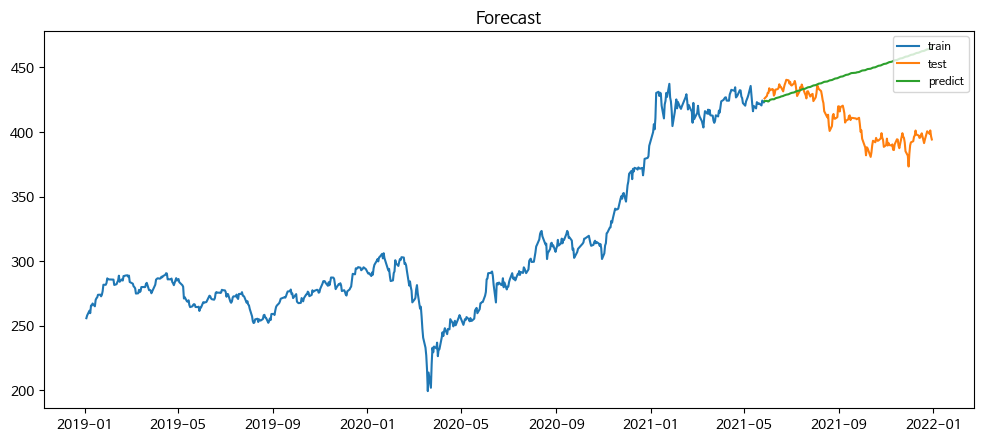

In [ ]:
# # Forecast
# fc, se, conf = model_fit.forecast(len(y_test), alpha=0.05)  # 95% conf

# # Make as pandas series
# predict = pd.Series(fc, index=y_test.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(y_train['종가'], label='train')
# plt.plot(y_test, label='test')
# plt.plot(predict, label='predict')
# plt.title('Forecast')
# plt.legend(loc='upper right', fontsize=8)
# plt.show()

#### 차분


In [ ]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


#### ARIMA 모형 적합

In [ ]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 1
                      , max_p = 2   
                      , start_q = 0 
                      , max_q = 0   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3361.760, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3360.247, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3360.943, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.118 seconds


#### 잔차 검정

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  593
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1678.123
Date:                Wed, 30 Mar 2022   AIC                           3360.247
Time:                        09:45:21   BIC                           3369.014
Sample:                             0   HQIC                          3363.662
                                - 593                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2783      0.169      1.644      0.100      -0.054       0.610
sigma2        16.9702      0.637     26.639      0.000      15.722      18.219
Ljung-Box (L1) (Q):                   0.49   Jarque-

#### 모형 refresh 및 예측

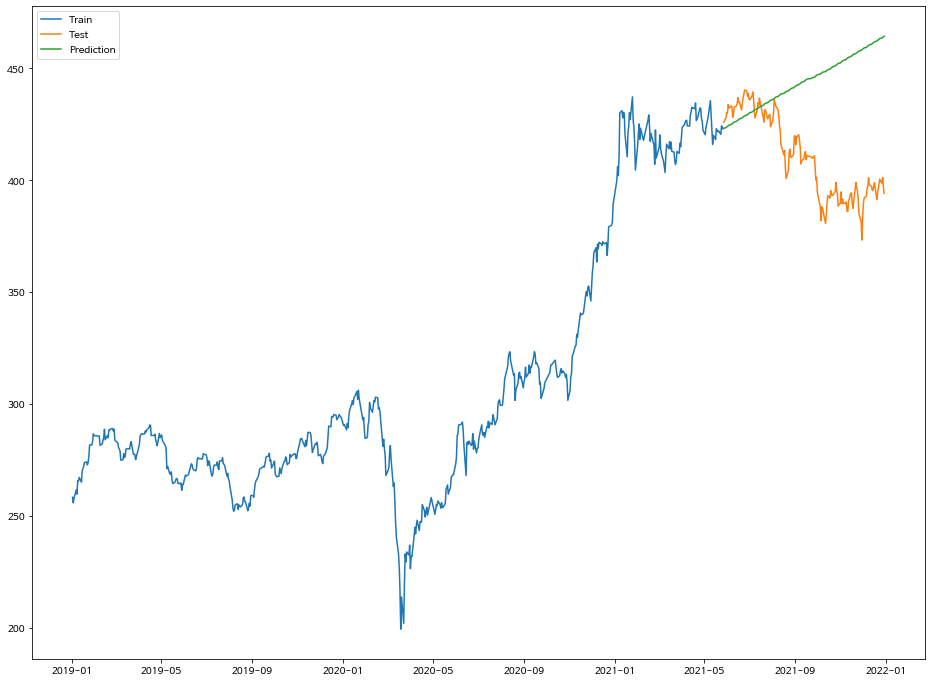

In [ ]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(16, 12))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [ ]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [ ]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
날짜,,
2021-05-28,425.95,423.278328
2021-05-31,427.91,426.232828
2021-06-01,430.32,428.195651
2021-06-02,430.15,430.609221
2021-06-03,433.87,430.438640
...,...,...
2021-12-24,400.53,398.340103
2021-12-27,398.61,400.723075
2021-12-28,401.21,398.800212


#### 잘 적합됐는지 시각화

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=600, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

#### 모델 평가
MAPE

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

MAPE: 0.722


# 삼성전자

005930

In [ ]:
삼성전자 = fdr.DataReader('005930', '2019-01-02', '2021-12-31')['Close']
삼성전자

Date
2019-01-02    38750
2019-01-03    37600
2019-01-04    37450
2019-01-07    38750
2019-01-08    38100
              ...  
2021-12-24    80500
2021-12-27    80200
2021-12-28    80300
2021-12-29    78800
2021-12-30    78300
Name: Close, Length: 742, dtype: int64

#### 시각화

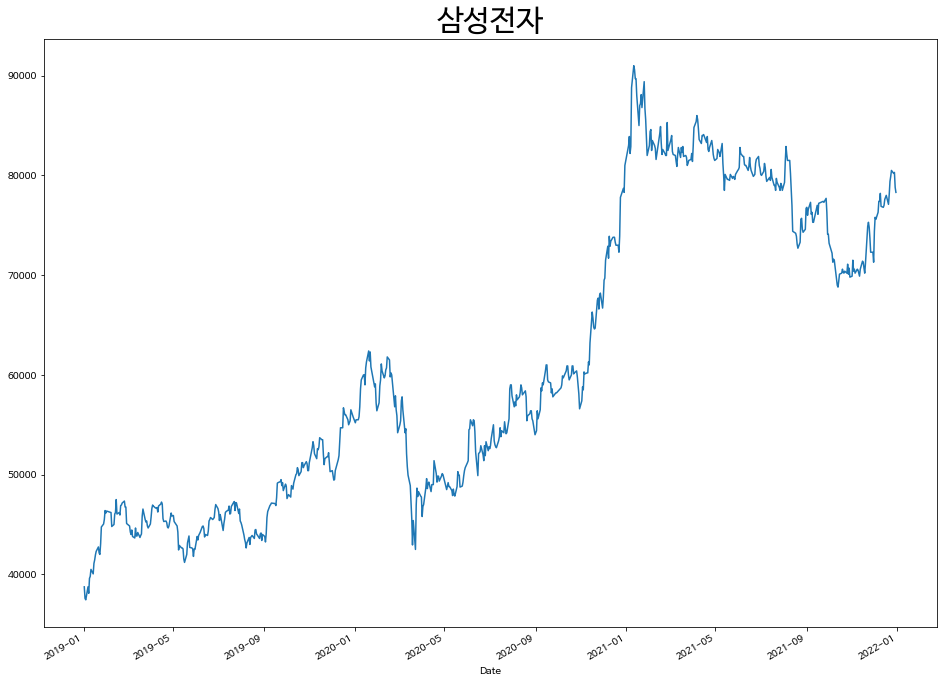

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(16,12))
plt.title("삼성전자", fontsize =30)
삼성전자.plot()

#### 데이터 나누기
train, test 8:2

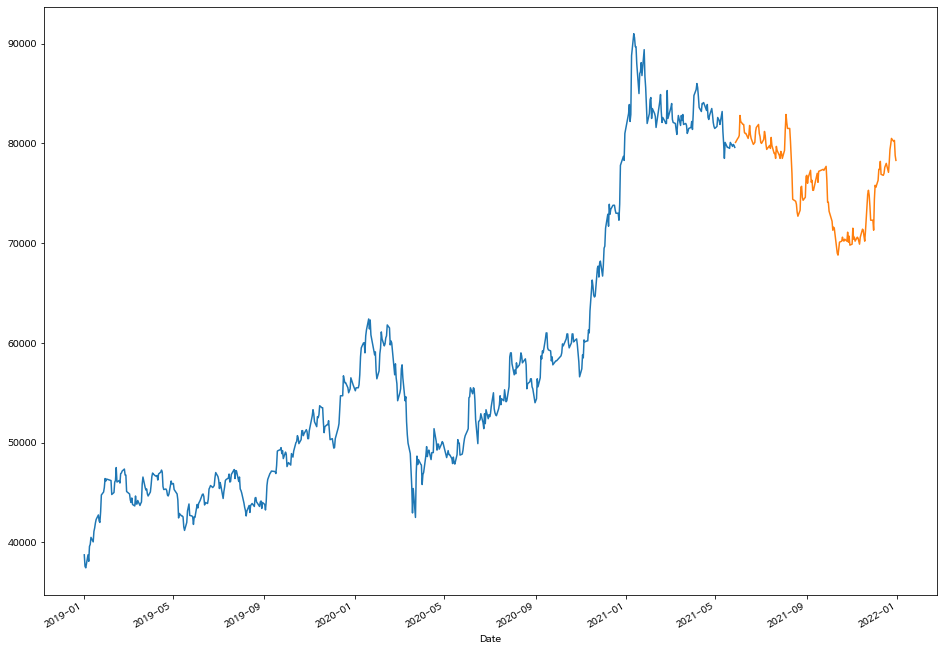

In [ ]:
# train, test 데이터 나누기
y_train = 삼성전자[:int(0.8*len(삼성전자))]
y_test = 삼성전자[int(0.8*len(삼성전자)):]
plt.figure(figsize=(16,12))
y_train.plot()
y_test.plot()

#### 차분


In [ ]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


#### ARIMA 모형 적합

In [ ]:
model = pm.auto_arima (y_train, d = 1, seasonal = False, trace = True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9879.387, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9876.675, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9878.511, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9878.514, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9877.423, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9880.515, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.744 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

#### 잔차 검정

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  593
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4936.338
Date:                Wed, 30 Mar 2022   AIC                           9876.675
Time:                        10:11:26   BIC                           9885.442
Sample:                             0   HQIC                          9880.090
                                - 593                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     69.0034     42.906      1.608      0.108     -15.092     153.099
sigma2      1.024e+06   3.91e+04     26.162      0.000    9.47e+05     1.1e+06
Ljung-Box (L1) (Q):                   0.19   Jarque-

#### 모형 refresh 및 예측

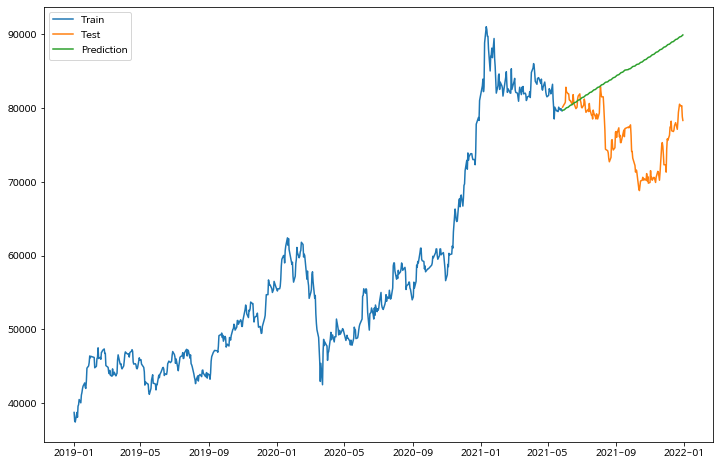

In [ ]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [ ]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [ ]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
Date,,
2021-05-28,80100,79669.003378
2021-05-31,80500,80169.003378
2021-06-01,80600,80569.003378
2021-06-02,80800,80669.003378
2021-06-03,82800,80869.003378
...,...,...
2021-12-24,80500,79949.343016
2021-12-27,80200,80549.343016
2021-12-28,80300,80249.897171


#### 잘 적합됐는지 시각화

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=600, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

#### 모델 평가
MAPE

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

MAPE: 0.908


In [ ]:
samsung = pd.DataFrame(삼성전자)
samsung

,Close
Date,
2019-01-02,38750
2019-01-03,37600
2019-01-04,37450
2019-01-07,38750
2019-01-08,38100
...,...
2021-12-24,80500
2021-12-27,80200
2021-12-28,80300


In [ ]:
samsung['diff_close'] = samsung['Close'].diff(1)

In [ ]:
samsung['log_diff_close'] = np.log(samsung['Close']).diff(1)

In [ ]:
samsung

,Close,diff_close,log_diff_close
Date,,,
2019-01-02,38750,NaN,NaN
2019-01-03,37600,-1150.0,-0.030127
2019-01-04,37450,-150.0,-0.003997
2019-01-07,38750,1300.0,0.034124
2019-01-08,38100,-650.0,-0.016916
...,...,...,...
2021-12-24,80500,600.0,0.007481
2021-12-27,80200,-300.0,-0.003734
2021-12-28,80300,100.0,0.001246


In [ ]:
samsung = samsung.iloc[1:]

In [ ]:
samsung

,Close,diff_close,log_diff_close
Date,,,
2019-01-03,37600,-1150.0,-0.030127
2019-01-04,37450,-150.0,-0.003997
2019-01-07,38750,1300.0,0.034124
2019-01-08,38100,-650.0,-0.016916
2019-01-09,39600,1500.0,0.038615
...,...,...,...
2021-12-24,80500,600.0,0.007481
2021-12-27,80200,-300.0,-0.003734
2021-12-28,80300,100.0,0.001246


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

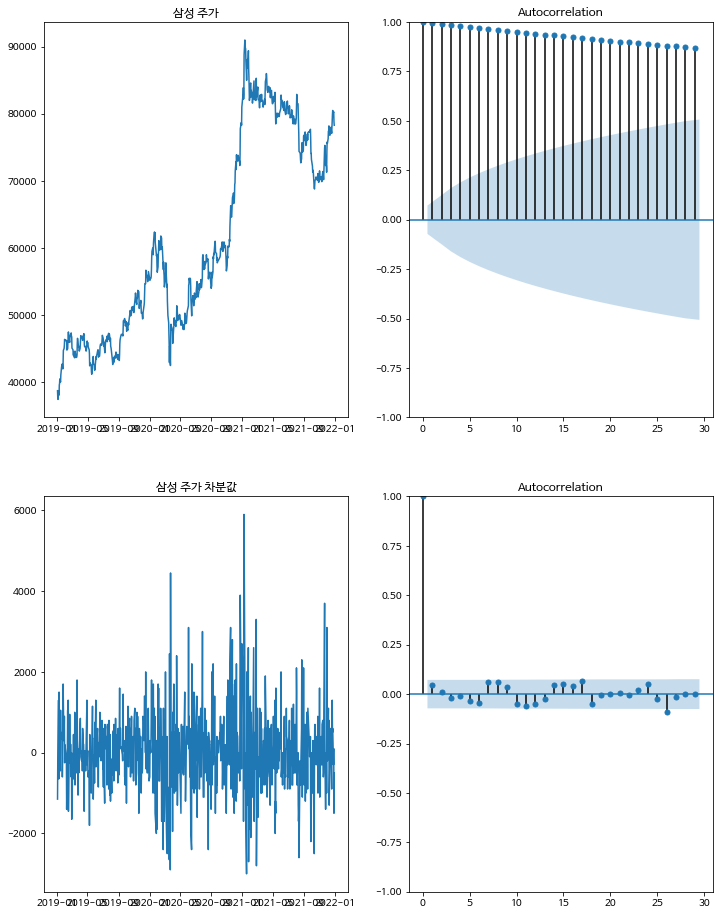

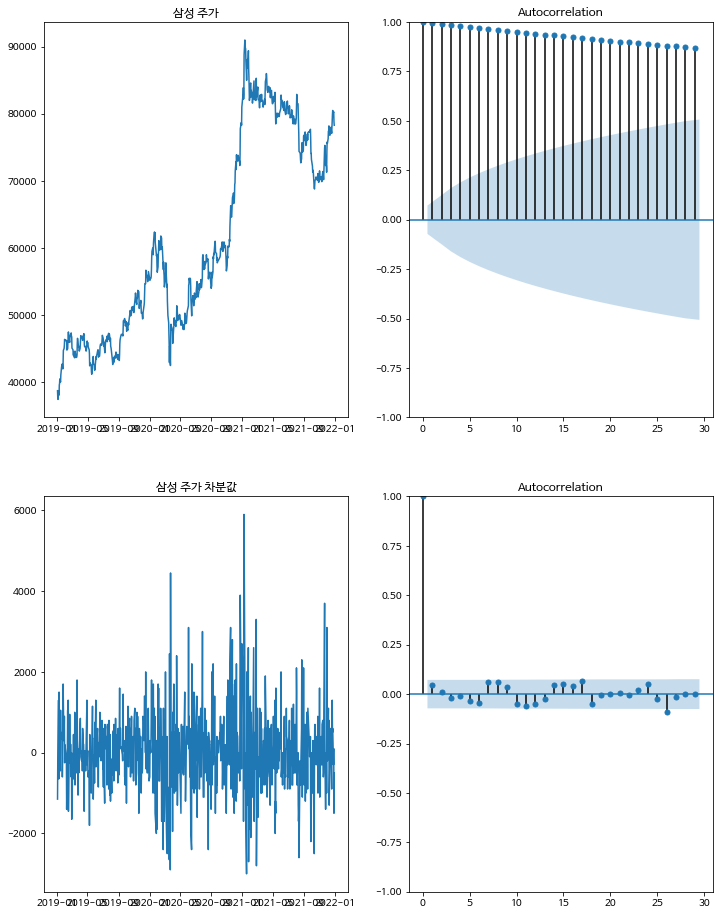

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(12,16))
ax[0,0].plot(samsung['Close'])
ax[0,0].set_title('삼성 주가')
ax[1,0].plot(samsung['diff_close'])
ax[1,0].set_title('삼성 주가 차분값')

plot_acf(samsung['Close'],ax=ax[0,1])
plot_acf(samsung['diff_close'][1:],ax=ax[1,1])

#### 데이터 나누기
train, test 8:2

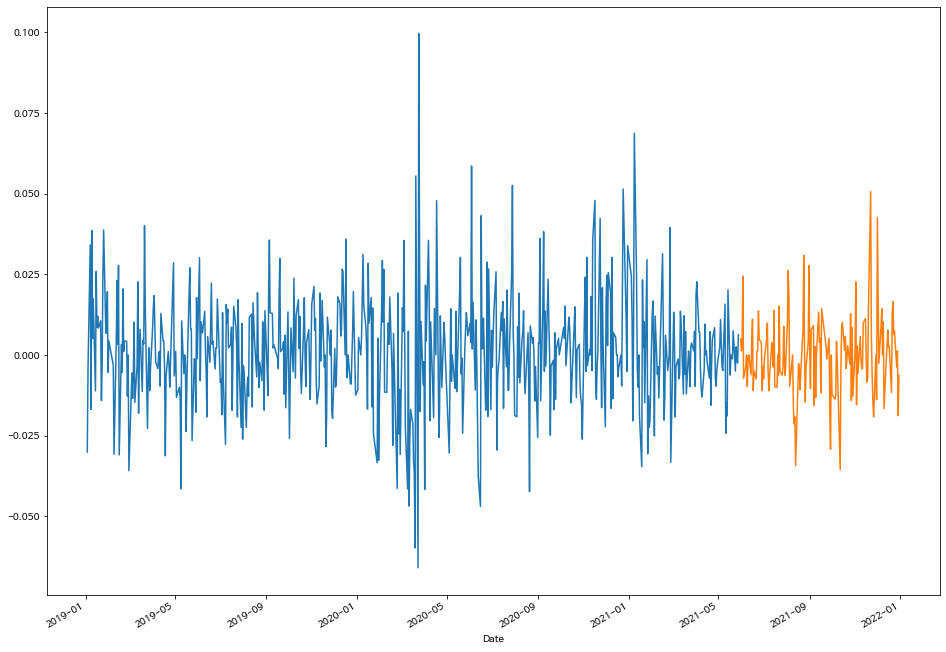

In [ ]:
# train, test 데이터 나누기
y_train = samsung['log_diff_close'][:int(0.8*len(삼성전자))]
y_test = samsung['log_diff_close'][int(0.8*len(삼성전자)):]
plt.figure(figsize=(16,12))
y_train.plot()
y_test.plot()

#### 차분


In [ ]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 0


#### ARIMA 모형 적합

In [ ]:
model = pm.auto_arima (y_train, d = 0, seasonal = False, trace = True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3100.534, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3105.487, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3103.490, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3103.489, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3101.500, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3106.360, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3104.365, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3104.365, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3102.466, Time=0.42 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.480 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

#### 잔차 검정

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  593
Model:                        SARIMAX   Log Likelihood                1555.180
Date:                Wed, 30 Mar 2022   AIC                          -3106.360
Time:                        11:23:30   BIC                          -3097.590
Sample:                             0   HQIC                         -3102.944
                                - 593                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      1.676      0.094      -0.000       0.003
sigma2         0.0003   1.22e-05     25.349      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

#### 모형 refresh 및 예측

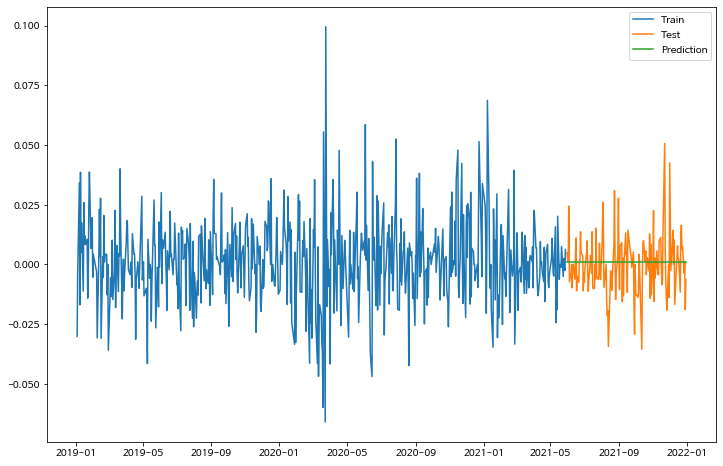

In [ ]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [ ]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [ ]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
Date,,
2021-05-31,0.004981,0.001225
2021-06-01,0.001241,0.001225
2021-06-02,0.002478,0.001225
2021-06-03,0.024451,0.001226
2021-06-04,-0.007273,0.001265
...,...,...
2021-12-24,0.007481,0.000978
2021-12-27,-0.003734,0.000987
2021-12-28,0.001246,0.000984


#### 잘 적합됐는지 시각화

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=600, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

#### 모델 평가
MAPE

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

MAPE: inf
